In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('network_backup_dataset.csv')

from sklearn.model_selection import cross_val_predict, KFold, train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

In [4]:
def residual_plot(prediction, truth):
    residual = truth - prediction
    plt.clf()
    plt.scatter(prediction,residual,edgecolors=(0, 0, 0))
    #plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted Values')
    plt.grid(True)
    plt.show()

def scatter_plot(prediction, truth):
    plt.clf()
    plt.scatter(truth, prediction, edgecolors=(0, 0, 0))
    plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
    plt.xlabel('Truth Value')
    plt.ylabel('Fitted Value')
    plt.title('Fitted Values vs. True Values')
    plt.grid(True)
    plt.show()

def convert_to_number(backup):
    #convert day of week to integer number
    backup.loc[backup['Day of Week']=='Monday','Day of Week'] = 1
    backup.loc[backup['Day of Week']=='Tuesday','Day of Week'] = 2
    backup.loc[backup['Day of Week']=='Wednesday','Day of Week'] = 3
    backup.loc[backup['Day of Week']=='Thursday','Day of Week'] = 4
    backup.loc[backup['Day of Week']=='Friday','Day of Week'] = 5
    backup.loc[backup['Day of Week']=='Saturday','Day of Week'] = 6
    backup.loc[backup['Day of Week']=='Sunday','Day of Week'] = 7

    #convert work-flow-id to integer number
    backup['Work-Flow-ID'] = backup['Work-Flow-ID'].str.extract('(\d+)',expand=False).astype(int)
    #convert File Name to integer number
    backup['File Name'] = backup['File Name'].str.extract('(\d+)',expand=False).astype(int)

For KNR model with weight uniform and n_neighbors as 1:

10-Fold Training RMSE: 0.0
10-Fold Testing RMSE: 0.020165775873018654


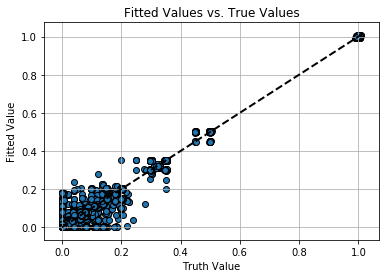

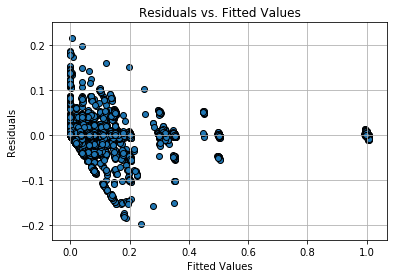

For KNR model with weight uniform and n_neighbors as 2:

10-Fold Training RMSE: 0.02895622065867378
10-Fold Testing RMSE: 0.03431224796735933


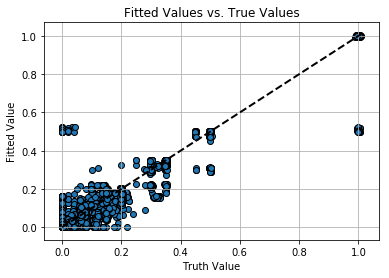

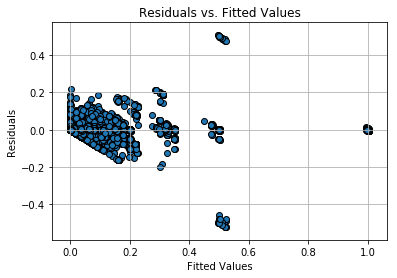

For KNR model with weight uniform and n_neighbors as 5:

10-Fold Training RMSE: 0.026962640874196808
10-Fold Testing RMSE: 0.04339364995943993


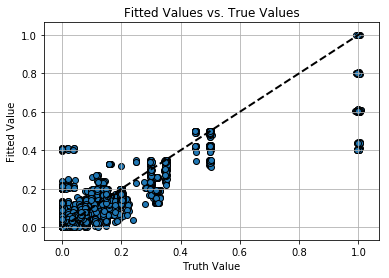

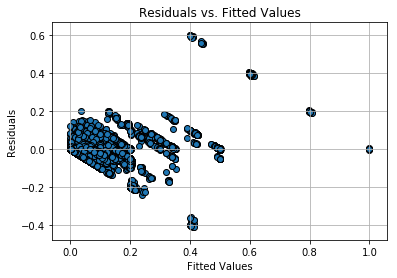

For KNR model with weight uniform and n_neighbors as 8:

10-Fold Training RMSE: 0.03634385396366641
10-Fold Testing RMSE: 0.046666173359154406


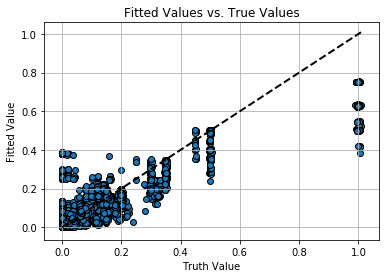

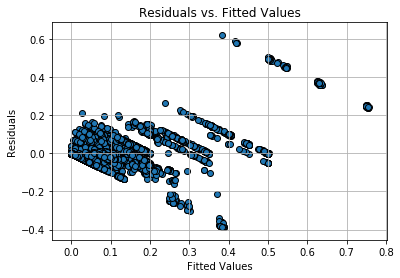

For KNR model with weight uniform and n_neighbors as 10:

10-Fold Training RMSE: 0.041382696367424525
10-Fold Testing RMSE: 0.04814860654594311


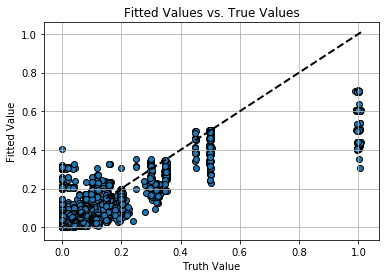

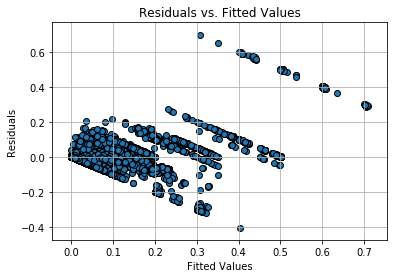

For KNR model with weight distance and n_neighbors as 1:

10-Fold Training RMSE: 0.0
10-Fold Testing RMSE: 0.020165775873018654


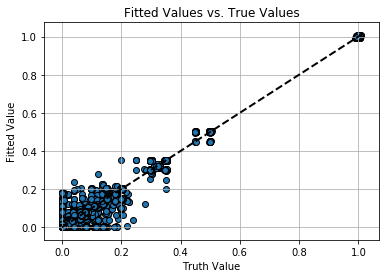

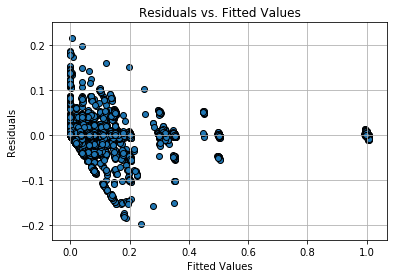

For KNR model with weight distance and n_neighbors as 2:

10-Fold Training RMSE: 0.0
10-Fold Testing RMSE: 0.030247962508845788


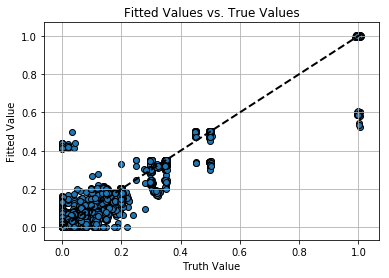

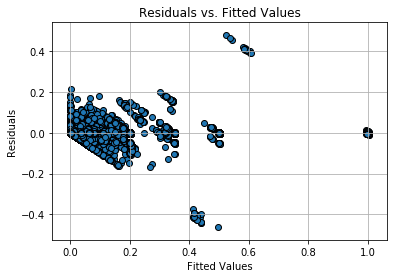

For KNR model with weight distance and n_neighbors as 5:

10-Fold Training RMSE: 0.0
10-Fold Testing RMSE: 0.03884182477240271


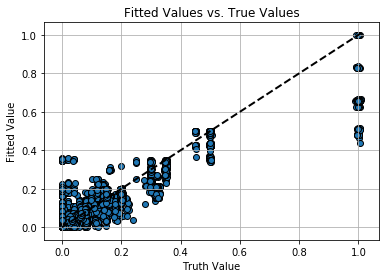

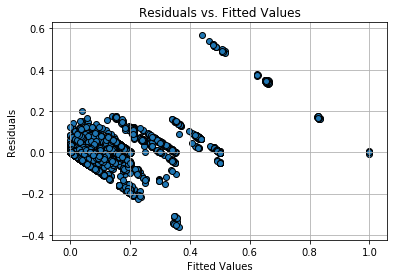

For KNR model with weight distance and n_neighbors as 8:

10-Fold Training RMSE: 0.0
10-Fold Testing RMSE: 0.04303738774058584


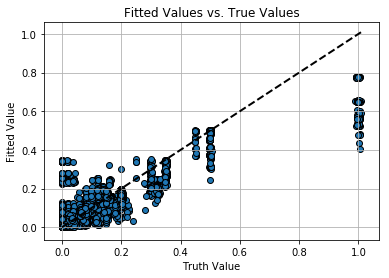

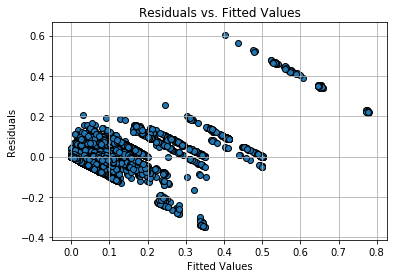

For KNR model with weight distance and n_neighbors as 10:

10-Fold Training RMSE: 0.0
10-Fold Testing RMSE: 0.04462710764239652


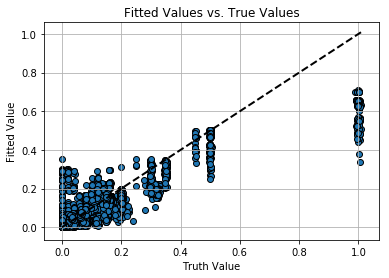

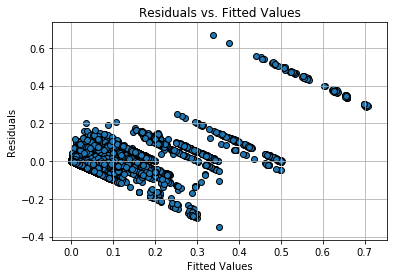

In [11]:
dataset = pd.read_csv('network_backup_dataset.csv')
convert_to_number(dataset)
data = dataset.values

neighbor_units = [1,2,5,8,10]
#neighbor_units.astype(np.int64)
weight_types = ['uniform','distance']

for i in range(2):
    for neighbors in neighbor_units:
        weights = weight_types[i]
        KNR = KNeighborsRegressor(n_neighbors = neighbors, weights = weights)
        kf = KFold(n_splits=10)
        train_rmse = 0
        test_rmse = 0
        predicted = list()
        truth = list()
        print('For KNR model with weight',weights,'and n_neighbors as %d:'%neighbors)
        for train_index, test_index in kf.split(data):
            data_train, data_test = data[train_index], data[test_index]
            KNR.fit(data_train[:,[0,1,2,3,4]],data_train[:,5])
            train_predict = KNR.predict(data_train[:,[0,1,2,3,4]])
            train_true = data_train[:,5]
            test_predict = KNR.predict(data_test[:,[0,1,2,3,4]])
            test_true = data_test[:,5]
            predicted.extend(test_predict.tolist())
            truth.extend(test_true.tolist())
            train_rmse += mean_squared_error(train_true, train_predict)
            test_rmse += mean_squared_error(test_true, test_predict)
        predicted = np.asarray(predicted)
        truth = np.asarray(truth)
        
        print()
        print('10-Fold Training RMSE:', np.sqrt(train_rmse / 10))
        print('10-Fold Testing RMSE:', np.sqrt(test_rmse / 10))
        plt.figure(1)
        scatter_plot(predicted ,truth)
    
        plt.figure(2)
        residual_plot(predicted ,truth)
        plt.show()